Bibliotecas utilizadas:

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando base de dados:

In [184]:
df = pd.read_csv('Data.csv')
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Tipo de dados das features:

In [185]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Soma dos valores nulos:

In [186]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Não à preço > 0 dos valores nulos de 'Descripition':

In [187]:
df_FiltroDesc = df[df['Description'].isnull() & (df['UnitPrice'] > 0)]
df_FiltroDesc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Excluindo linhas nulas da Description:

In [188]:
df = df.dropna(subset=['Description'])
df['Description'].isnull().sum()

np.int64(0)

Valida dados nulos ou menor que 0 da coluna preços:

In [189]:
filtro = df[(df['UnitPrice'].isna()) | (df['UnitPrice'] < 0)]
filtro

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


Ajusta preço e quantidade maior que 0:

In [190]:
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)].sort_values(by='UnitPrice', ascending=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
308637,564043,16045,POPART WOODEN PENCILS ASST,100,8/22/2011 12:55,0.04,14414.0,United Kingdom
301848,563355,16045,POPART WOODEN PENCILS ASST,100,8/15/2011 14:39,0.04,14156.0,EIRE
284398,561870,16045,POPART WOODEN PENCILS ASST,100,7/31/2011 11:45,0.04,14911.0,EIRE
379865,569714,16045,POPART WOODEN PENCILS ASST,100,10/5/2011 17:28,0.04,18033.0,United Kingdom
301033,563234,16045,POPART WOODEN PENCILS ASST,100,8/15/2011 8:26,0.04,13621.0,United Kingdom


In [191]:
linhas_duplicadas = df[df.duplicated()]
linhas_duplicadas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
335168,566279,17136A,BLUE STONES ON WIRE FOR CANDLE,24,9/11/2011 14:09,0.08,14432.0,United Kingdom
335167,566279,17136A,BLUE STONES ON WIRE FOR CANDLE,24,9/11/2011 14:09,0.08,14432.0,United Kingdom
395901,571046,17136A,BLUE STONES ON WIRE FOR CANDLE,4,10/13/2011 13:35,0.08,18096.0,United Kingdom
534821,581173,20668,DISCO BALL CHRISTMAS DECORATION,24,12/7/2011 15:07,0.12,17870.0,United Kingdom
504466,578950,20668,DISCO BALL CHRISTMAS DECORATION,24,11/27/2011 14:40,0.12,17885.0,United Kingdom
...,...,...,...,...,...,...,...,...
155285,549981,23007,SPACEBOY BABY GIFT SET,1,4/13/2011 15:49,16.95,16348.0,United Kingdom
438307,574311,22946,WOODEN ADVENT CALENDAR CREAM,1,11/3/2011 16:56,16.95,15640.0,United Kingdom
206213,554917,22848,BREAD BIN DINER STYLE PINK,1,5/27/2011 12:29,16.95,15104.0,United Kingdom
206212,554917,22849,BREAD BIN DINER STYLE MINT,1,5/27/2011 12:29,16.95,15104.0,United Kingdom


Remove linhas duplicadas:

In [192]:
print('Antes: ', df.shape)

Antes:  (530104, 8)


In [193]:
df = df.drop_duplicates()
print('Depois: ', df.shape)

Depois:  (524878, 8)


Transformando dados:

In [194]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['CustomerID'] = df['CustomerID'].fillna(0)
df['CustomerID'] = df['CustomerID'].astype(int)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

Identificando Outliers:

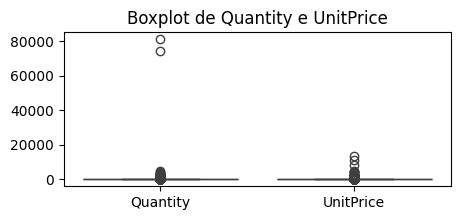

In [195]:
# Gráfico de dispersão
plt.figure(figsize=(5, 2))
sns.boxplot(data=df[['Quantity', 'UnitPrice']])
plt.title('Boxplot de Quantity e UnitPrice')
plt.show()


Without Outliers:

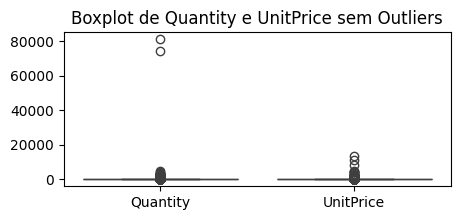

In [196]:
df_cleaned = df[~((df['Quantity'] > 10000) & (df['UnitPrice'] > 5000))]

# Gráfico de boxplot
plt.figure(figsize=(5, 2))
sns.boxplot(data=df_cleaned[['Quantity', 'UnitPrice']])
plt.title('Boxplot de Quantity e UnitPrice sem Outliers')
plt.show()

Nova coluna de TotalPrice:

In [199]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
308637,564043,16045,POPART WOODEN PENCILS ASST,100,2011-08-22 12:55:00,0.04,14414,United Kingdom,4.0
301848,563355,16045,POPART WOODEN PENCILS ASST,100,2011-08-15 14:39:00,0.04,14156,EIRE,4.0
284398,561870,16045,POPART WOODEN PENCILS ASST,100,2011-07-31 11:45:00,0.04,14911,EIRE,4.0
379865,569714,16045,POPART WOODEN PENCILS ASST,100,2011-10-05 17:28:00,0.04,18033,United Kingdom,4.0
301033,563234,16045,POPART WOODEN PENCILS ASST,100,2011-08-15 08:26:00,0.04,13621,United Kingdom,4.0


Data da ultima compra:

In [216]:
ultima_compra = df['InvoiceDate'].max()
print("Data da última compra:", ultima_compra)

Data da última compra: 2011-12-09 12:50:00


## Plotando Gráficos:

Top 10 países com maior valor em vendas:

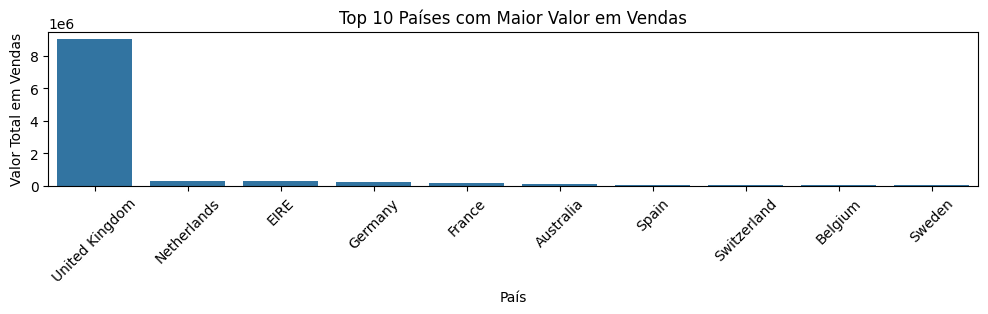

In [202]:
# Agregar dados por país e calcular o valor total de vendas
top_paises = df.groupby('Country')['TotalPrice'].sum().nlargest(10)

# Plotar
plt.figure(figsize=(12, 2))
sns.barplot(x=top_paises.index, y=top_paises.values)
plt.xticks(rotation=45)
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('País')
plt.ylabel('Valor Total em Vendas')
plt.show()

Top 10 produtos mais vendidos:

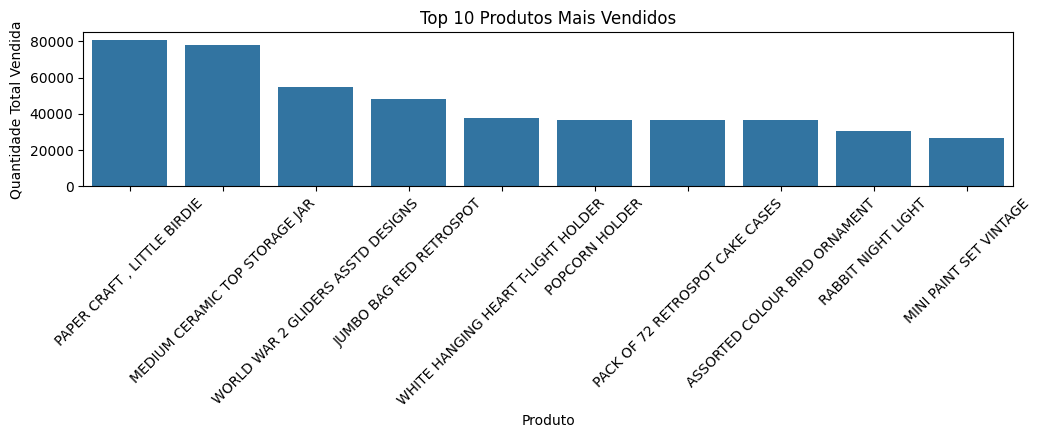

In [204]:
# Agregar dados por produto e calcular a quantidade total vendida
top_produtos = df.groupby('Description')['Quantity'].sum().nlargest(10)

# Plotar
plt.figure(figsize=(12, 2))
sns.barplot(x=top_produtos.index, y=top_produtos.values)
plt.xticks(rotation=45)
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Total Vendida')
plt.show()

Valor de venda total por mês:

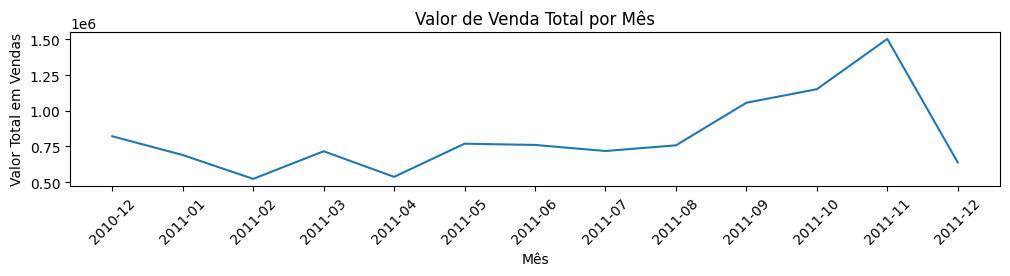

In [207]:
# Extrair ano e mês da coluna 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Agregar dados por mês e calcular o valor total de vendas
vendas_por_mes = df.groupby('YearMonth')['TotalPrice'].sum()

# Plotar
plt.figure(figsize=(12, 2))
sns.lineplot(x=vendas_por_mes.index.astype(str), y=vendas_por_mes.values)
plt.xticks(rotation=45)
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total em Vendas')
plt.show()

Valor de venda total por mês e por país (considerando apenas os top 10 países):

<Figure size 1200x200 with 0 Axes>

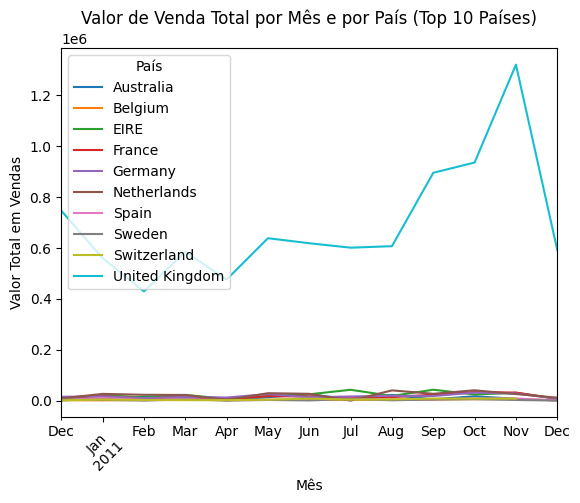

In [215]:
# Filtrar apenas os top 10 países
top_paises_list = top_paises.index
df_top_paises = df[df['Country'].isin(top_paises_list)]

# Agregar dados por mês e país, e calcular o valor total de vendas
vendas_por_mes_pais = df_top_paises.groupby(['YearMonth', 'Country'])['TotalPrice'].sum().unstack()

# Plotar
plt.figure(figsize=(12, 2))
vendas_por_mes_pais.plot(kind='line')
plt.title('Valor de Venda Total por Mês e por País (Top 10 Países)')
plt.xlabel('Mês')
plt.ylabel('Valor Total em Vendas')
plt.legend(title='País')
plt.xticks(rotation=45)
plt.show()

## Cálculo do RFM